<a href="https://colab.research.google.com/github/anish170805/ML-Algos/blob/main/NB_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gaussian Naive Bayes

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

X = data.drop("Species", axis=1)
y = data['Species']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

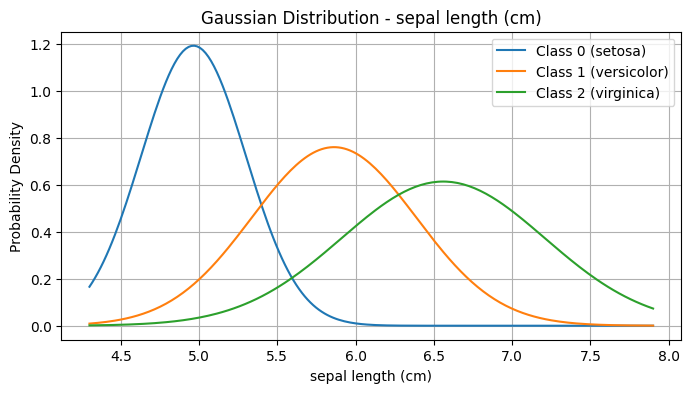

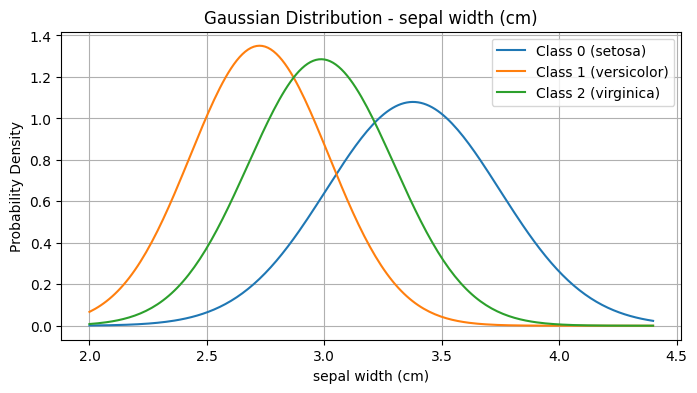

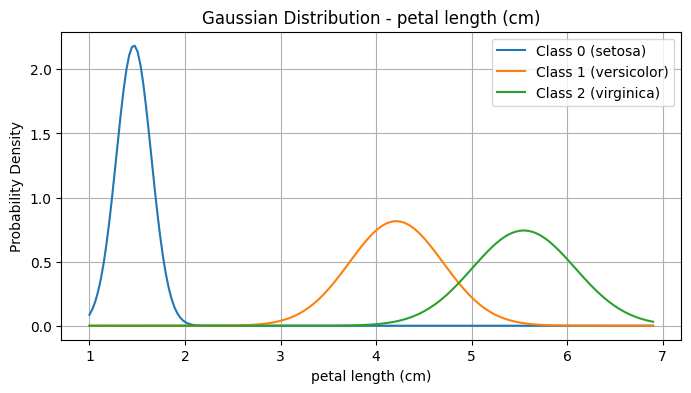

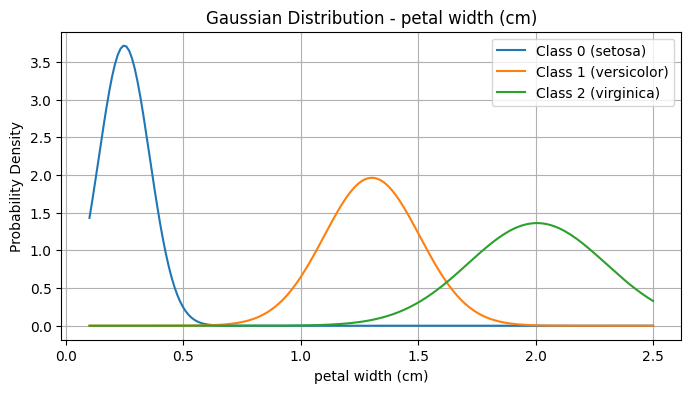

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

feature_names = iris.feature_names
num_features = len(feature_names)
num_classes = len(np.unique(y))

X_np = X.to_numpy()

for feature_index in range(num_features):
    feature_name = feature_names[feature_index]
    x_vals = np.linspace(X_np[:, feature_index].min(), X_np[:, feature_index].max(), 200)

    plt.figure(figsize=(8, 4))

    for cls in range(num_classes):
        mean = gnb.theta_[cls, feature_index]
        std = np.sqrt(gnb.var_[cls, feature_index])
        y_vals = norm.pdf(x_vals, mean, std)
        plt.plot(x_vals, y_vals, label=f"Class {cls} ({iris.target_names[cls]})")

    plt.title(f"Gaussian Distribution - {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction on Iris Flower is: {accuracy}")

The Accuracy of Prediction on Iris Flower is: 0.9777777777777777


### Multinomial Naive Bayes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

df = pd.DataFrame(data)

In [ ]:
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

In [ ]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Accuracy: 66.67%



In [ ]:
custom_message = ["Congratulations, you've won a free vacation"]
print(custom_message)
custom_vector = vectorizer.transform(custom_message)
prediction = model.predict(custom_vector)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")

["Congratulations, you've won a free vacation"]
Prediction for custom message: Spam


### Bernoulli Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/spam_ham_dataset.csv")
print(df.shape)
print(df.columns)
df= df.drop(['Unnamed: 0'], axis=1)

(5171, 4)
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [ ]:
x = df["text"].values
y = df["label_num"].values

cv = CountVectorizer()

x = cv.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)\

bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       732
           1       0.92      0.56      0.70       303

    accuracy                           0.86      1035
   macro avg       0.88      0.77      0.80      1035
weighted avg       0.87      0.86      0.84      1035

